In [176]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import math as mymath
from scipy import stats

In [177]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/StudentsPerformance.csv"
data= pd.read_csv(file) #reading file

In [178]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some high school,free/reduced,none,0,17,10
1,female,group B,high school,free/reduced,none,8,24,23
2,female,group B,some high school,free/reduced,none,18,32,28
3,female,group B,some college,standard,none,11,38,32
4,female,group C,some college,free/reduced,none,22,39,33


In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [180]:
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [181]:
data.describe()

,math score,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,66.001000,69.195000,68.119000
std,15.569567,14.706436,15.226381
min,0.000000,17.000000,10.000000
25%,57.000000,59.000000,58.000000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.250000,79.000000
max,100.000000,100.000000,100.000000


In [182]:
data.mode()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group C,some college,standard,none,65,72,74


In [183]:
data.skew()

C:\Users\ppbin\AppData\Local\Temp\ipykernel_7180\1188251951.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.skew()


math score      -0.401174
reading score   -0.288362
writing score   -0.301511
dtype: float64

In [184]:
data.kurt()

C:\Users\ppbin\AppData\Local\Temp\ipykernel_7180\2907027414.py:1: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.kurt()


math score       0.471960
reading score   -0.044448
writing score   -0.031677
dtype: float64

In [185]:
#1. Number of males and females participated in the test
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [186]:
# 2. students' parental level of
data['parental level of education'].value_counts() 


some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [187]:
y=data['parental level of education'].value_counts()

In [188]:
y

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [189]:
y.min()

59

In [190]:
y.max()

226

<Axes: xlabel='parental level of education', ylabel='count'>

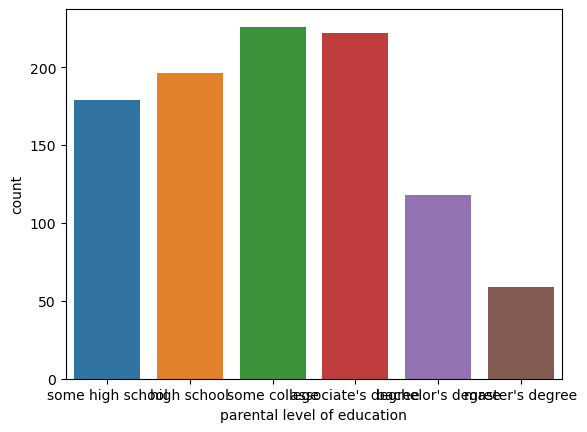

In [191]:
sns.countplot(x=data["parental level of education"])

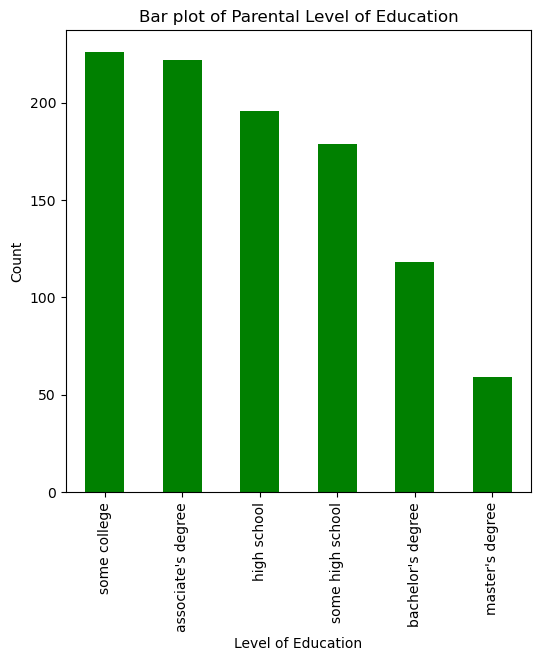

In [192]:
# Bar plot values_count
plt.figure(figsize=(6,6))
plt.title('Bar plot of Parental Level of Education')
plt.xlabel('Level of Education')
plt.ylabel('Count')
y.plot(kind='bar', color='green')
plt.show()

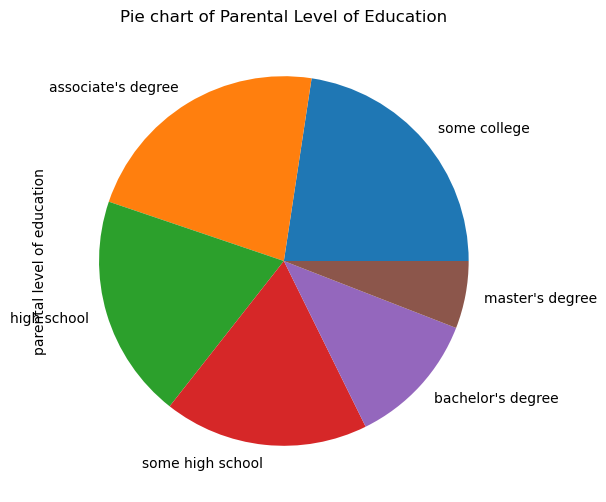

In [193]:
# Pie chart of values_count
plt.figure(figsize=(6,6))
plt.title('Pie chart of Parental Level of Education')
y.plot(kind='pie')
plt.show()

<Axes: xlabel='parental level of education', ylabel='math score'>

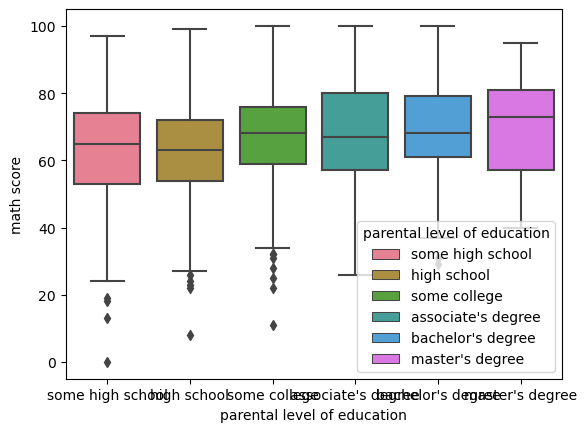

In [194]:
#  boxplot of math score vs parental level of education
sns.boxplot(x="parental level of education", y="math score", palette="husl", data=data,hue="parental level of education",dodge=False)

<Axes: xlabel='parental level of education', ylabel='reading score'>

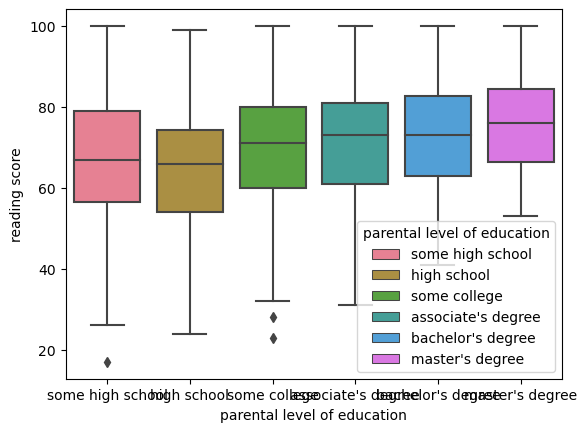

In [195]:
#  boxplot of reading score vs parental level of education
sns.boxplot(x="parental level of education", y="reading score", palette="husl", data=data,hue="parental level of education",dodge=False)

<Axes: xlabel='parental level of education', ylabel='writing score'>

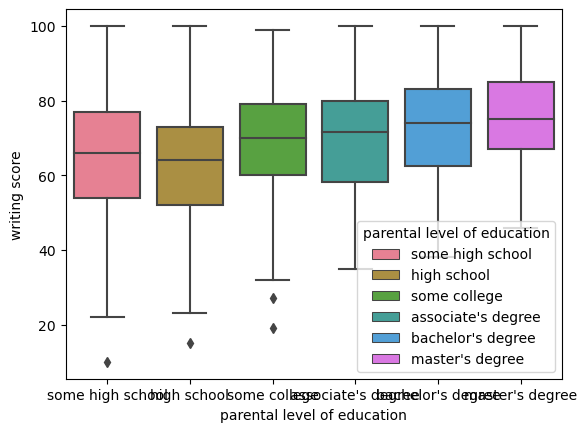

In [196]:
#  boxplot of writing score vs parental level of education
sns.boxplot(x="parental level of education", y="writing score", palette="husl", data=data,hue="parental level of education",dodge=False)

<Axes: xlabel='parental level of education', ylabel='math score'>

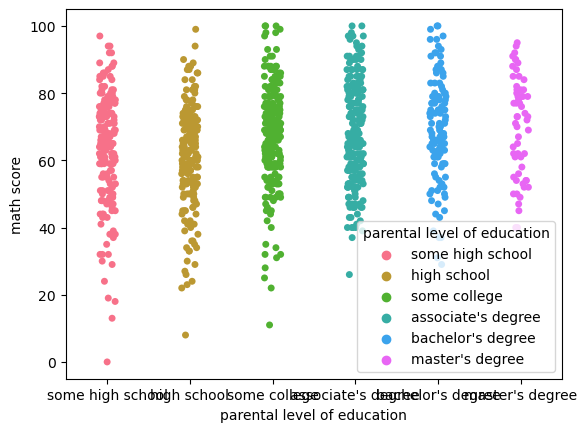

In [197]:
#  strip plot of math score vs parental level of education
sns.stripplot(x="parental level of education", y="math score", palette="husl", data=data,hue="parental level of education",dodge=False)

<Axes: xlabel='parental level of education', ylabel='reading score'>

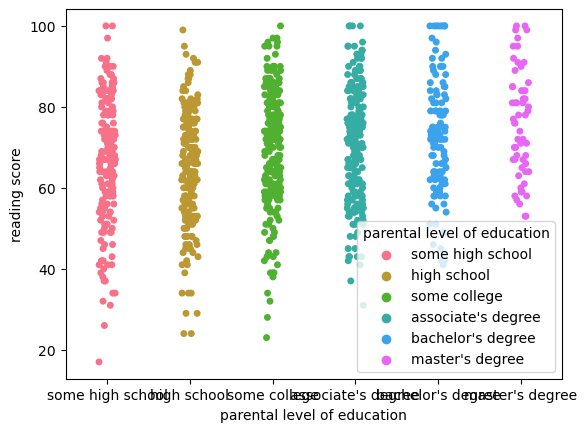

In [198]:
#  boxplot of reading score vs parental level of education
sns.stripplot(x="parental level of education", y="reading score", palette="husl", data=data,hue="parental level of education",dodge=False)

<Axes: xlabel='parental level of education', ylabel='writing score'>

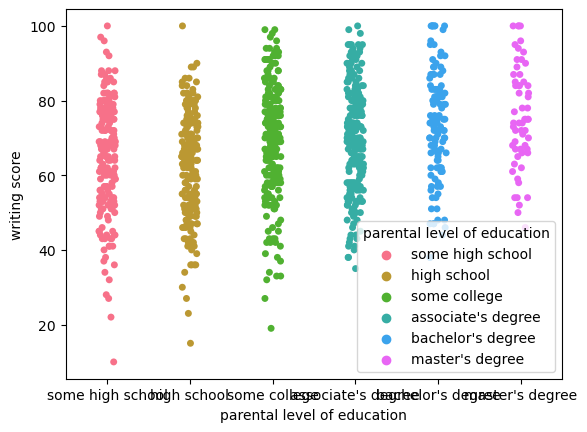

In [199]:
#  strip plot of writing score vs parental level of education
sns.stripplot(x="parental level of education", y="writing score", palette="husl", data=data,hue="parental level of education",dodge=False)

In [200]:
#3. Who scores the most on average for math, reading and writing based on Gender
data.groupby('gender')['math score'].describe()


,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,63.376448,16.029928,0.0,54.0,65.0,74.0,100.0
male,482.0,68.821577,14.556411,27.0,59.0,69.0,79.0,100.0


In [201]:
data.groupby('gender')['math score'].mean()

gender
female    63.376448
male      68.821577
Name: math score, dtype: float64

In [202]:
print('Male score high in math')

Male score high in math


In [203]:
data.groupby('gender')['reading score'].mean()

gender
female    72.590734
male      65.545643
Name: reading score, dtype: float64

In [204]:
print('Female score high in reading')

Female score high in reading


In [205]:
data.groupby('gender')['writing score'].mean()

gender
female    72.467181
male      63.446058
Name: writing score, dtype: float64

In [206]:
print('Female score high in reading')

Female score high in reading


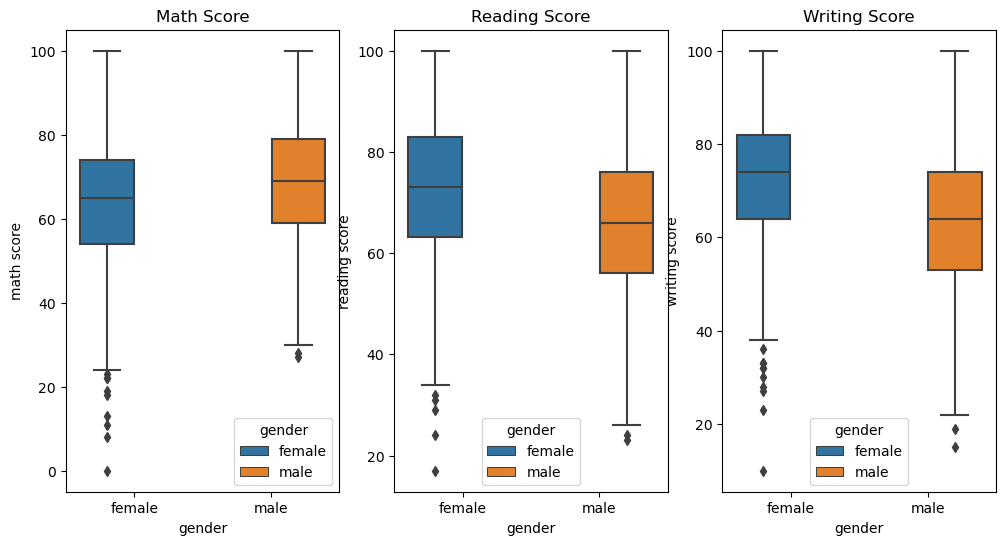

In [207]:
# math, reading and writing vs Gender
# Boxplots
#create subplots

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(x='gender', y='math score', data=data,hue="gender")
plt.title('Math Score')
plt.subplot(1,3,2)
sns.boxplot(x='gender', y='reading score', data=data,hue="gender")
plt.title('Reading Score')
plt.subplot(1,3,3)
sns.boxplot(x='gender', y='writing score', data=data,hue="gender")
plt.title('Writing Score')
plt.show()


In [208]:
# Who scores the most on average for math, reading and writing based on Test preparation course
data.groupby('test preparation course')['math score'].mean()

test preparation course
completed    69.96648
none         63.78972
Name: math score, dtype: float64

In [209]:
data.groupby('test preparation course')['reading score'].mean()

test preparation course
completed    74.175978
none         66.417445
Name: reading score, dtype: float64

In [210]:
data.groupby('test preparation course')['writing score'].mean()

test preparation course
completed    74.684358
none         64.457944
Name: writing score, dtype: float64

In [211]:
print('Average math, reading and writing scores of Students Completed test preparation course  is higher than students having no test preparation course')

Average math, reading and writing scores of Students Completed test preparation course  is higher than students having no test preparation course


In [212]:
#What do you think about the scoring variation for math, reading and writing based on Gender and Test preparation course

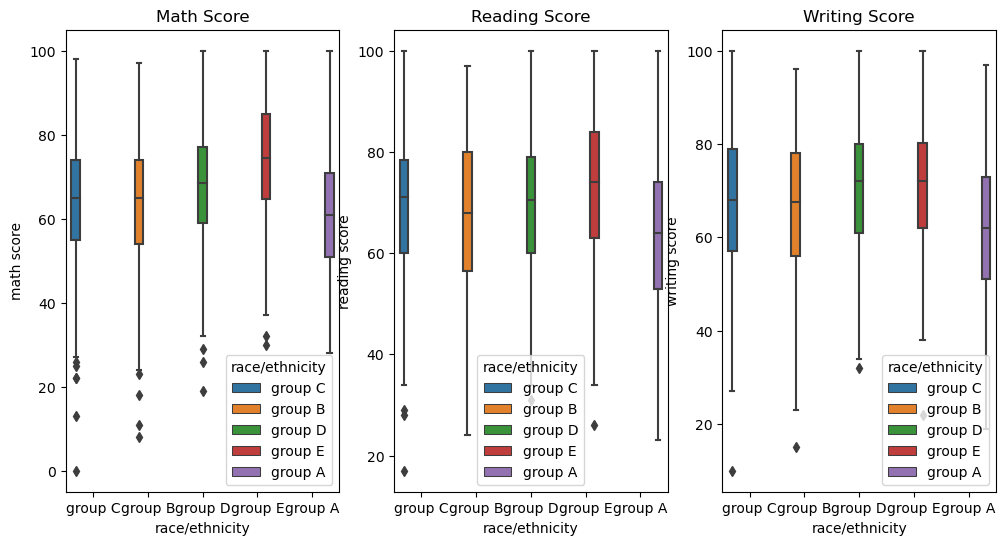

In [213]:
# math, reading and writing vs race/ethnicity
# Boxplots

plt.figure(figsize=(12,6))
plt.subplot(1,3,1)
sns.boxplot(x='race/ethnicity', y='math score', data=data,hue="race/ethnicity")
plt.title('Math Score')
plt.subplot(1,3,2)
sns.boxplot(x='race/ethnicity', y='reading score', data=data,hue="race/ethnicity")
plt.title('Reading Score')
plt.subplot(1,3,3)
sns.boxplot(x='race/ethnicity', y='writing score', data=data,hue="race/ethnicity")
plt.title('Writing Score')
plt.show()

<Axes: xlabel='math score', ylabel='gender'>

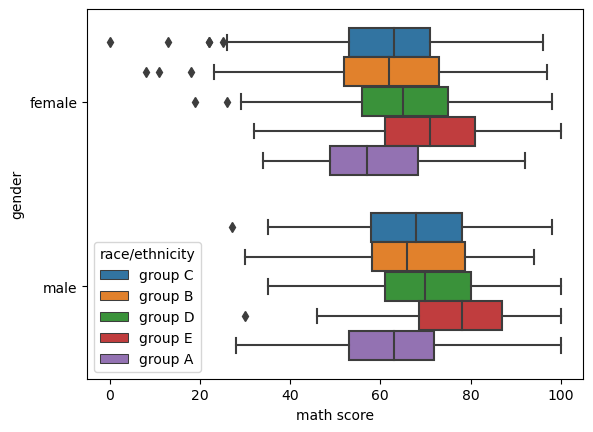

In [214]:
sns.boxplot(data=data, x="math score", y="gender", hue="race/ethnicity")

<Axes: xlabel='reading score', ylabel='gender'>

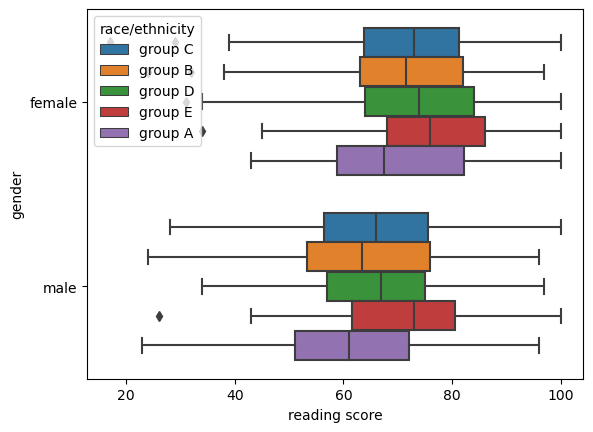

In [215]:
sns.boxplot(data=data, x="reading score", y="gender", hue="race/ethnicity")

<Axes: xlabel='writing score', ylabel='gender'>

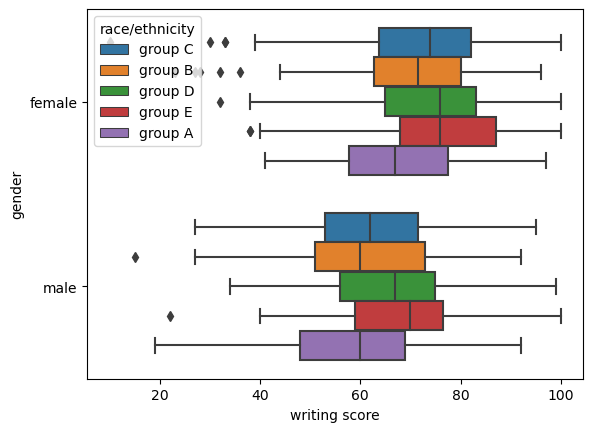

In [216]:
sns.boxplot(data=data, x="writing score", y="gender", hue="race/ethnicity")

<Axes: xlabel='math score', ylabel='gender'>

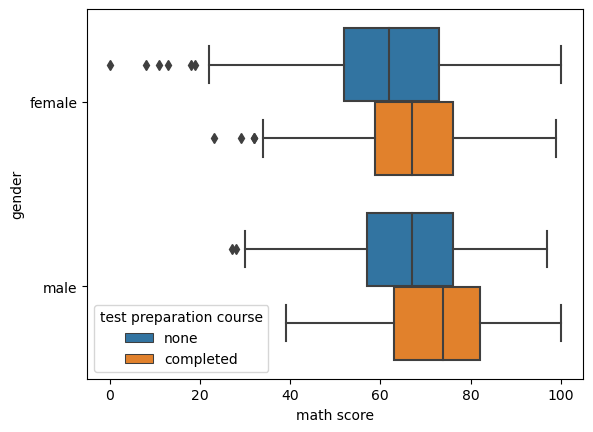

In [217]:
sns.boxplot(data=data, x="math score", y="gender", hue="test preparation course")

<Axes: xlabel='reading score', ylabel='gender'>

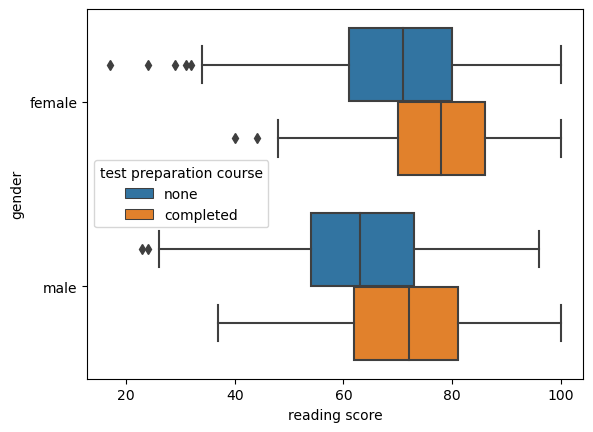

In [218]:
sns.boxplot(data=data, x="reading score", y="gender", hue="test preparation course")

<Axes: xlabel='writing score', ylabel='gender'>

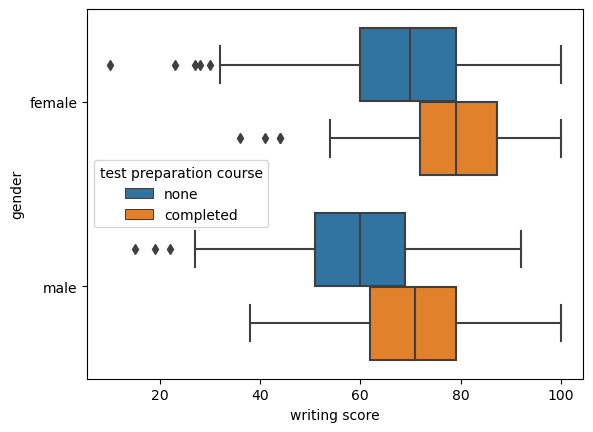

In [219]:
sns.boxplot(data=data, x="writing score", y="gender", hue="test preparation course")

In [220]:
math_score=data['math score']



In [221]:
math_score.count()

1000

In [222]:
# math score of top 25% of students 
mathtop=sorted(math_score)[750:1000]


In [223]:
mathtop=np.array(mathtop)
mathtop

array([ 77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,  77,
        77,  77,  77,  77,  77,  77,  78,  78,  78,  78,  78,  78,  78,
        78,  78,  78,  78,  78,  78,  78,  78,  79,  79,  79,  79,  79,
        79,  79,  79,  79,  79,  79,  79,  79,  79,  79,  79,  79,  79,
        79,  79,  79,  79,  80,  80,  80,  80,  80,  80,  80,  80,  80,
        80,  80,  80,  80,  80,  80,  80,  80,  81,  81,  81,  81,  81,
        81,  81,  81,  81,  81,  81,  81,  81,  81,  81,  81,  81,  81,
        81,  81,  81,  81,  82,  82,  82,  82,  82,  82,  82,  82,  82,
        82,  82,  82,  82,  82,  82,  82,  82,  82,  83,  83,  83,  83,
        83,  83,  83,  83,  84,  84,  84,  84,  84,  84,  84,  84,  84,
        84,  84,  85,  85,  85,  85,  85,  85,  85,  85,  85,  85,  85,
        85,  85,  85,  86,  86,  86,  86,  86,  86,  86,  86,  87,  87,
        87,  87,  87,  87,  87,  87,  87,  87,  87,  87,  87,  87,  87,
        87,  88,  88,  88,  88,  88,  88,  88,  88,  88,  88,  8

(array([56., 39., 26., 33., 31., 15., 19.,  9.,  9., 13.]),
 array([ 77. ,  79.3,  81.6,  83.9,  86.2,  88.5,  90.8,  93.1,  95.4,
         97.7, 100. ]),
 <BarContainer object of 10 artists>)

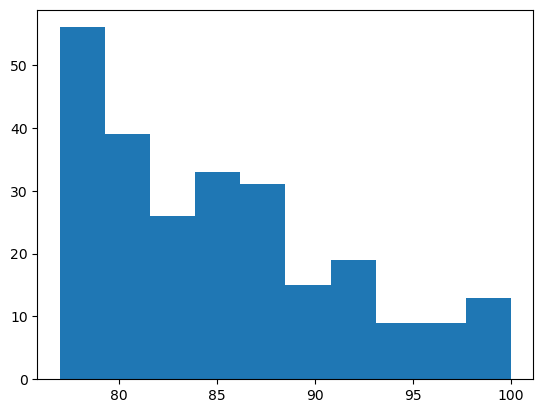

In [224]:
plt.hist(mathtop)